# BERT Fine-tuning results

In [28]:
import wandb
import matplotlib.pyplot as plt

In [29]:
wandb.login(key='16369bd7209659e59c09993b5ec54d3950923d45')
api = wandb.Api()

project_name = "bert_multiling_test3"

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/gustaw/.netrc


In [30]:
runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")
history = runs[0].history()
history.head()

,_timestamp,eval/overall_accuracy,train/learning_rate,eval/loss,train/loss,train/epoch,eval/O_recall,eval/steps_per_second,eval/recall,eval/I-COUPON_recall,eval/samples_per_second,eval/f1,eval/precision,eval/runtime,train/global_step,eval/B-COUPON_recall,_runtime,train/grad_norm,_step
0,1.741902e+09,NaN,0.000020,NaN,0.3955,0.052770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,6.822745,7.893408,1
1,1.741902e+09,NaN,0.000019,NaN,0.2788,0.079156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,7.268792,1.164436,2
2,1.741902e+09,NaN,0.000018,NaN,0.0935,0.290237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,NaN,10.130525,4.540478,10
3,1.741902e+09,NaN,0.000017,NaN,0.0315,0.448549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170,NaN,12.382797,10.703791,16
4,1.741902e+09,NaN,0.000016,NaN,0.0811,0.580475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,NaN,14.346735,0.179738,21


In [31]:
history.columns

Index(['_timestamp', 'eval/overall_accuracy', 'train/learning_rate',
       'eval/loss', 'train/loss', 'train/epoch', 'eval/O_recall',
       'eval/steps_per_second', 'eval/recall', 'eval/I-COUPON_recall',
       'eval/samples_per_second', 'eval/f1', 'eval/precision', 'eval/runtime',
       'train/global_step', 'eval/B-COUPON_recall', '_runtime',
       'train/grad_norm', '_step'],
      dtype='object')

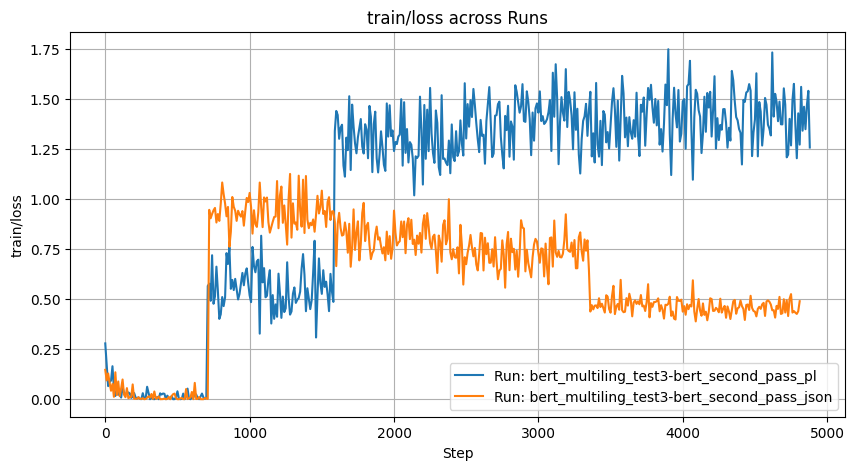

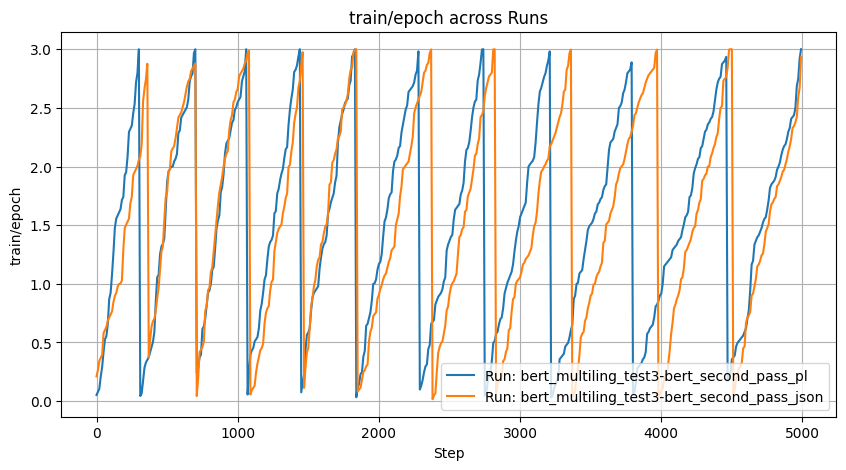

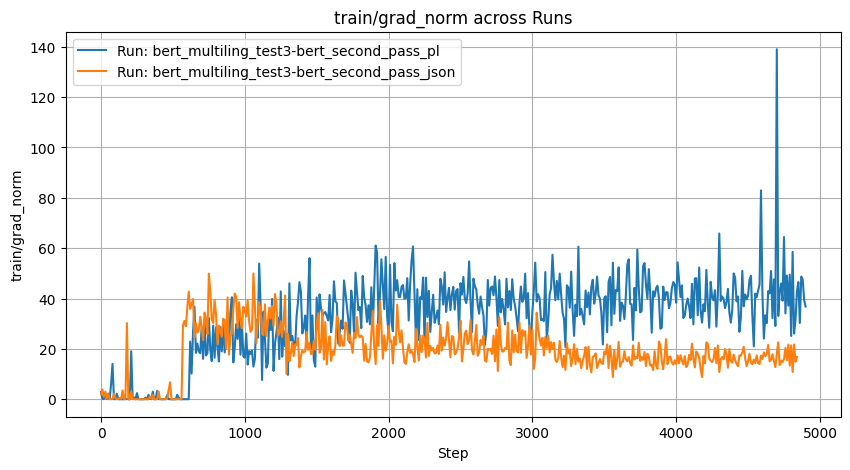

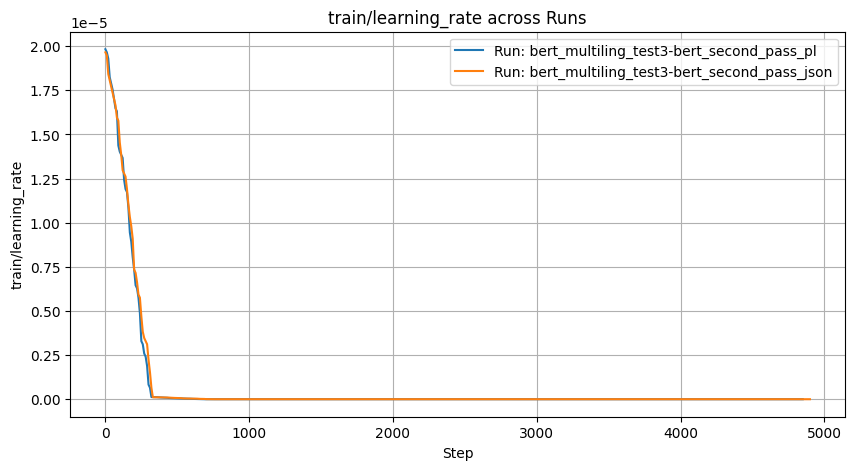

In [32]:
def plot_runs_data(runs, metric):
    plt.figure(figsize=(10, 5))
    for run in runs:
        hist = run.history()
        if hist.shape[0] == 0:
            continue
        if metric in hist.columns:
            # filter-out nans
            data = hist[metric].dropna()
            labels = [x*10 for x in range(data.shape[0])]
            #print(hist.columns)
            #print(hist[metric])
            plt.plot(labels, data, label=f"Run: {run.name}")

    plt.xlabel("Step")
    plt.ylabel(metric)
    plt.title(f"{metric} across Runs")
    plt.legend()
    plt.grid()
    plt.show()

plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/epoch")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

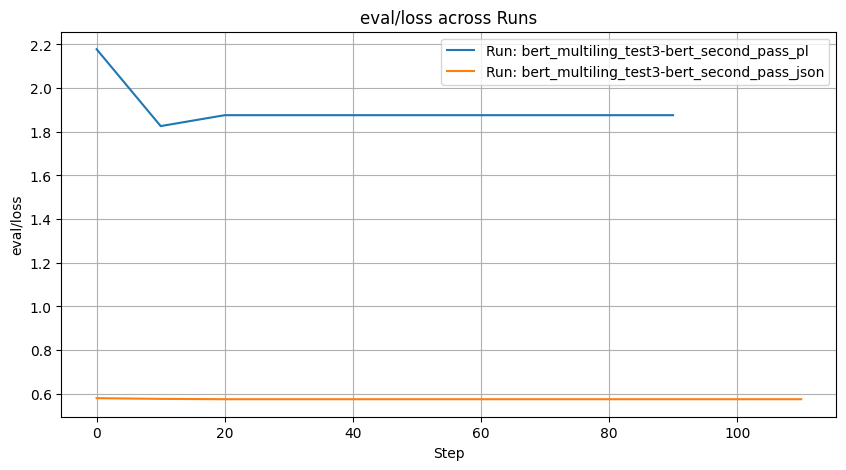

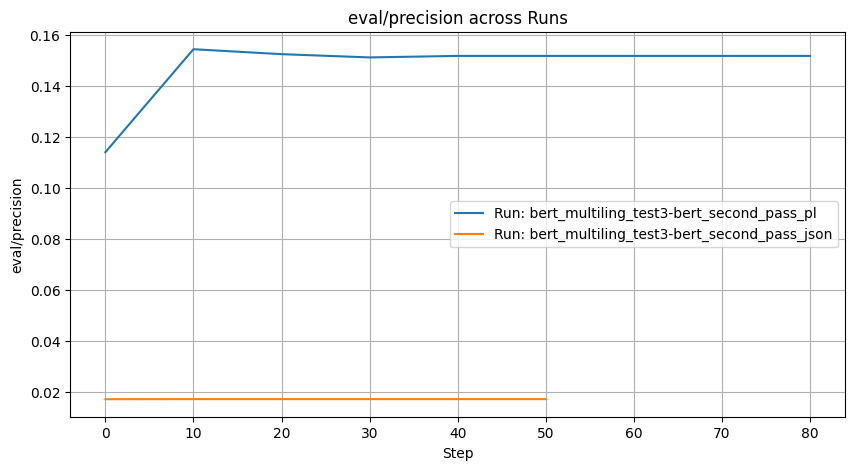

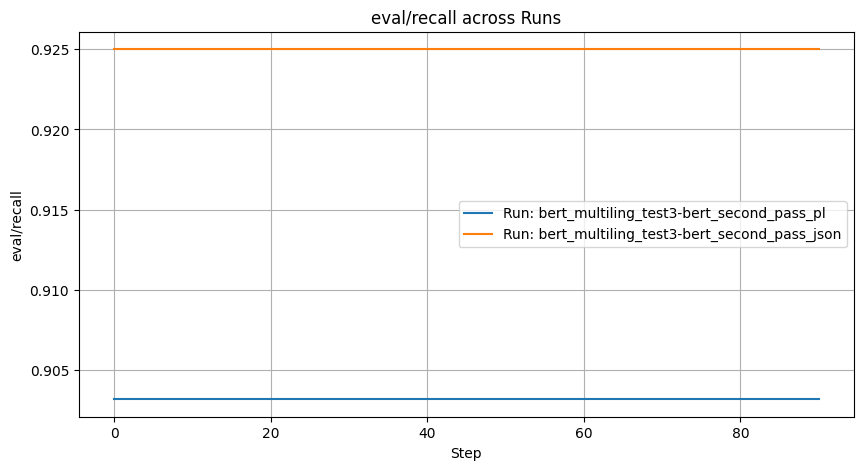

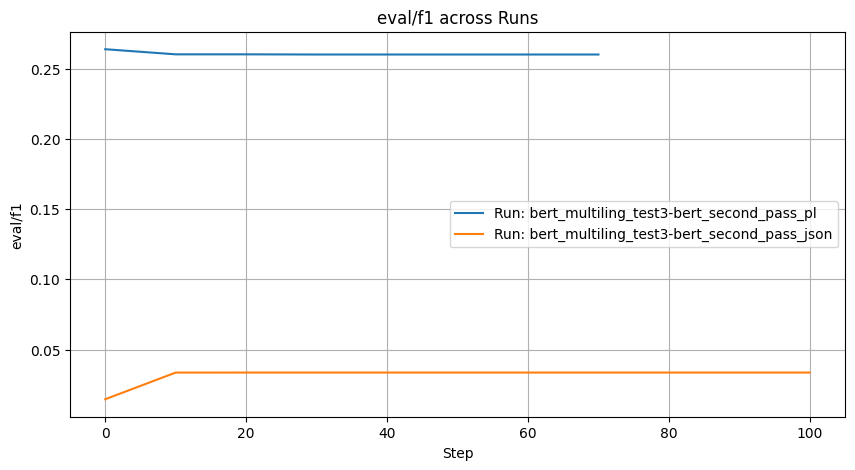

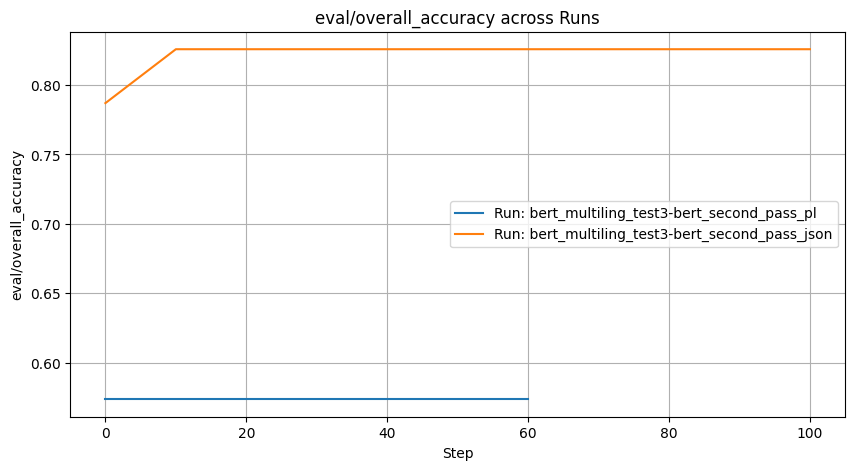

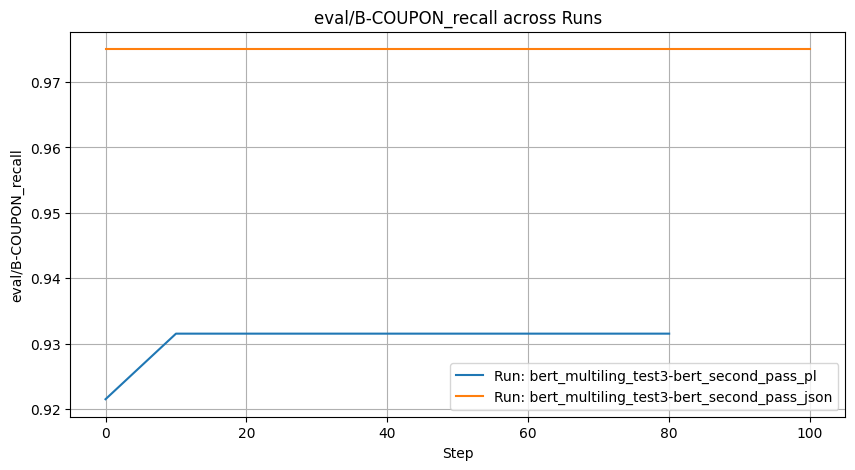

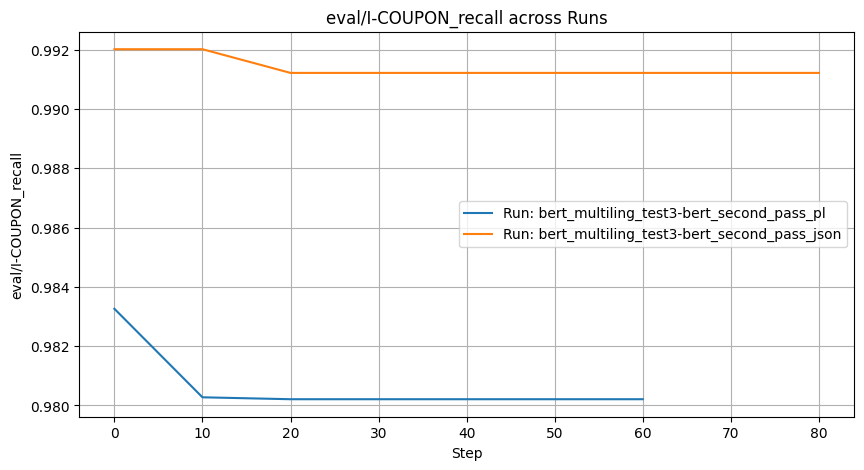

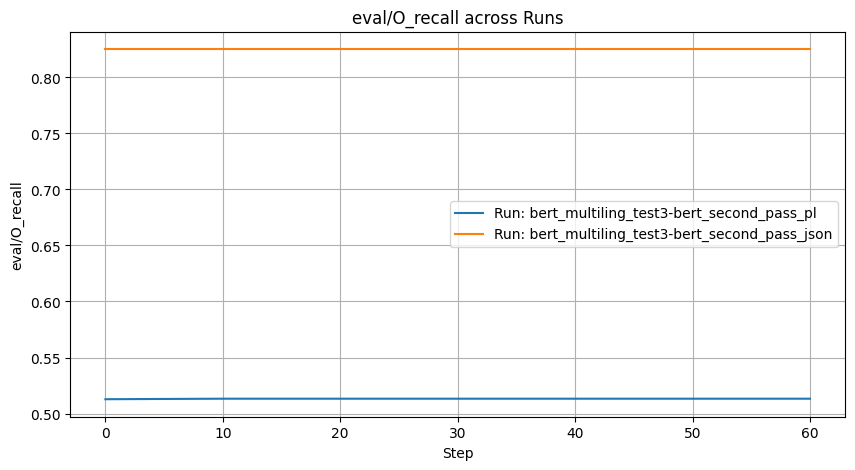

In [33]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")
plot_runs_data(runs, "eval/f1")
plot_runs_data(runs, "eval/overall_accuracy")
plot_runs_data(runs, "eval/B-COUPON_recall")
plot_runs_data(runs, "eval/I-COUPON_recall")
plot_runs_data(runs, "eval/O_recall")